### Import libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

In [9]:
pd.options.display.max_columns = None

### load data

In [10]:
ks_2018 = pd.read_csv('ks-projects-201801.csv')

In [12]:
ks_2018.shape

(378661, 15)

In [11]:
ks_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [13]:
ks_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [14]:
ks_2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [16]:
ks_2018.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [21]:
ks_2018.main_category.value_counts()

main_category
Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: count, dtype: int64

In [22]:
ks_2018.currency.value_counts()

currency
USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: count, dtype: int64

In [23]:
ks_2018.state.value_counts()

state
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: count, dtype: int64

In [26]:
ks_2018.country.value_counts()

country
US    292627
GB     33672
CA     14756
AU      7839
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1757
MX      1752
NZ      1447
DK      1113
IE       811
CH       761
NO       708
HK       618
BE       617
AT       597
SG       555
LU        62
JP        40
Name: count, dtype: int64

### Data Cleaning

In [25]:
ks_2018.country.replace('N,0"', np.nan, inplace=True)

In [32]:
ks_2018.deadline = pd.to_datetime(ks_2018.deadline)
ks_2018.launched = pd.to_datetime(ks_2018.launched)

In [33]:
ks_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           374864 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [36]:
ks_2018.duplicated().sum()

0

### Exploratory Data Analysis

In [49]:
category_counts = ks_2018.category.value_counts().head(20)

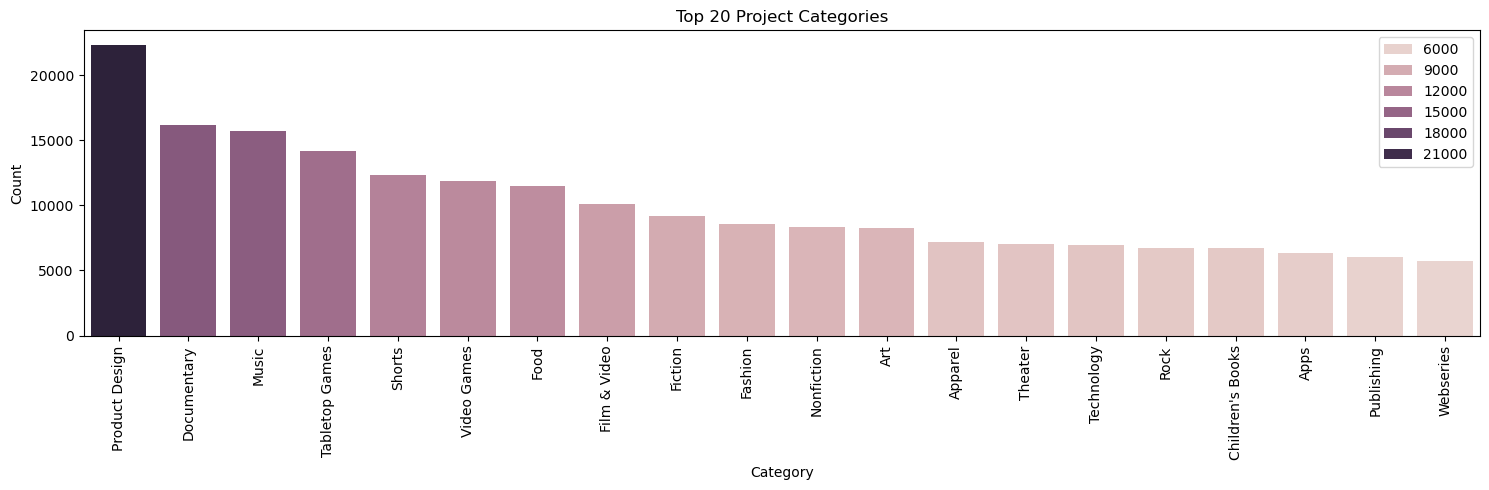

In [54]:
plt.figure(figsize=(15, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.values)
plt.title('Top 20 Project Categories')  
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [57]:
main_category_counts = ks_2018['main_category'].value_counts()
main_category_counts_sorted = main_category_counts.sort_values(ascending=False)

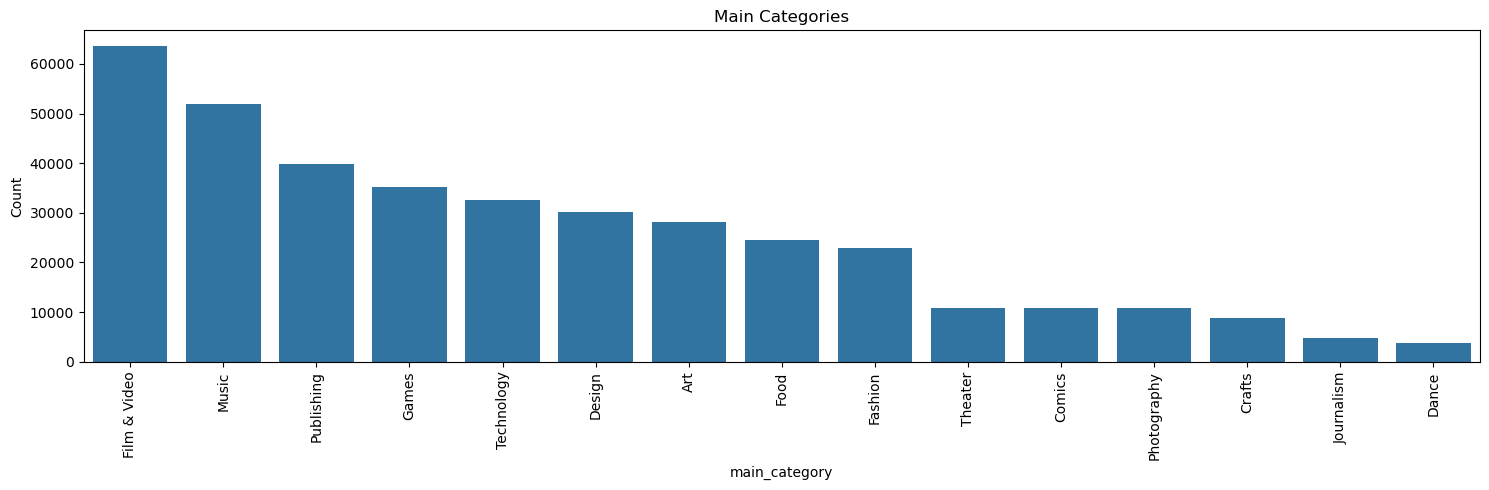

In [62]:
plt.figure(figsize=(15, 5))
sns.countplot(x=ks_2018['main_category'], data=ks_2018, order=main_category_counts_sorted.index)
plt.title('Main Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [67]:
successful_projects = ks_2018[ks_2018.state == "successful"]
success_by_country = successful_projects.groupby('country').size().reset_index(name='count')
success_by_country = success_by_country.sort_values(by='count', ascending=False)

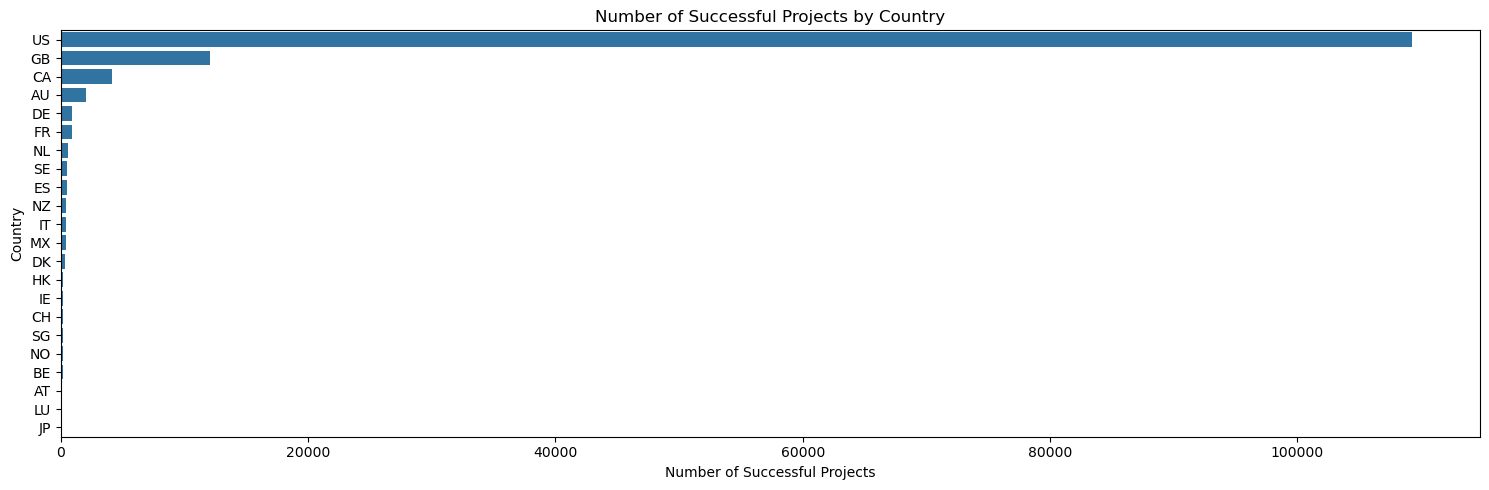

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x='count', data=success_by_country, y = 'country')
plt.title('Number of Successful Projects by Country')
plt.xlabel('Number of Successful Projects')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [69]:
state_count = ks_2018['state'].value_counts().sort_values(ascending=False)

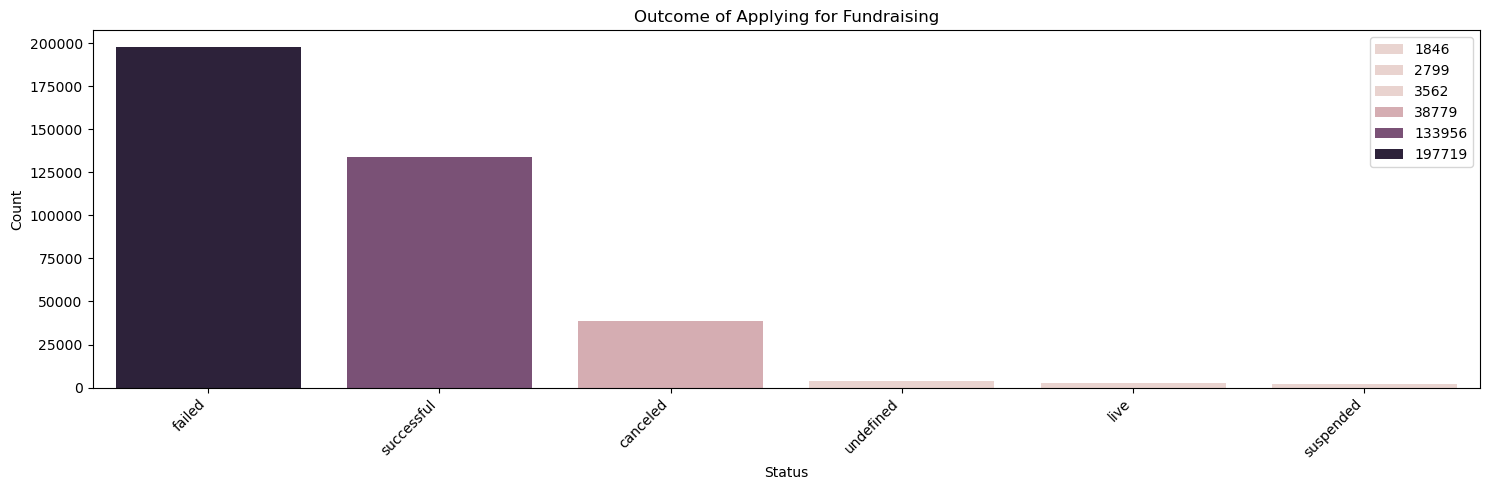

In [71]:
plt.figure(figsize=(15, 5))  
sns.barplot(x=state_count.index, y=state_count.values, order=state_count.index, hue=state_count.values)  
plt.title('Outcome of Applying for Fundraising') 
plt.xlabel('Status')  
plt.ylabel('Count')  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show() 

In [75]:
# percentage of successfull projects
total_ks = len(ks_2018)
successful_ks = len(ks_2018[ks_2018.state == "successful"])
percentage_successful = (successful_ks / total_ks) * 100
print("Percentage of successful projects among all values:", percentage_successful, "%")

Percentage of successful projects among all values: 35.37623362321443 %


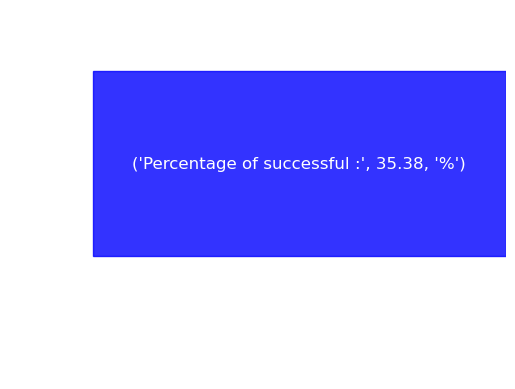

In [132]:
# Create a rectangle
rectangle_width = 5
rectangle_height = 3
rectangle_x = 1
rectangle_y = 2

fig, ax = plt.subplots()

# Add the rectangle patch to the plot
rect = Rectangle((rectangle_x, rectangle_y), rectangle_width, rectangle_height, fill=True, color='#0000ff', alpha=0.8)
ax.add_patch(rect)

# Calculate the center of the rectangle
center_x = rectangle_x + rectangle_width / 2
center_y = rectangle_y + rectangle_height / 2

# Add text to the center of the rectangle
text_content = "Percentage of successful :", np.round(percentage_successful, 2), "%"
ax.text(center_x, center_y, text_content, fontsize=12, ha='center', va='center', color="#ffffff")

# Set axis limits
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.axis('off')
plt.show()


In [112]:
describe_usd_goal_real = ks_2018['usd_goal_real'].describe()
describe_usd_pledged_real = ks_2018['usd_pledged_real'].describe()

print("Summary statistics for 'usd_goal_real' column:")
print(describe_usd_goal_real)

print("\nSummary statistics for 'usd_pledged_real' column:")
print(describe_usd_pledged_real)

Summary statistics for 'usd_goal_real' column:
count    3.786610e+05
mean     4.545440e+04
std      1.152950e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.550000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

Summary statistics for 'usd_pledged_real' column:
count    3.786610e+05
mean     9.058924e+03
std      9.097334e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.243300e+02
75%      4.050000e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64


In [119]:
ks_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


##### Data insights on Goal fundraise and Pledged money

In [122]:
# Summary statistics for money needed for launching the Project
print("Summary statistics for money needed for launching the Project:")
print(ks_2018.goal.describe())
# Summary statistics for money raised for Project
print("Summary statistics for money raised for Project :")
print(ks_2018.usd_goal_real.describe())

Summary statistics for money needed for launching the Project:
count    3.786610e+05
mean     4.908079e+04
std      1.183391e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.200000e+03
75%      1.600000e+04
max      1.000000e+08
Name: goal, dtype: float64
Summary statistics for money raised for Project :
count    3.786610e+05
mean     4.545440e+04
std      1.152950e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.550000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64


In [124]:
filtered_data = ks_2018[ (ks_2018["usd_goal_real"] > 0) & (ks_2018["usd_goal_real"] < ks_2018["usd_goal_real"].quantile(0.95)) ]

C:\Users\ahmed_gamal\AppData\Local\Temp\ipykernel_3304\4093742408.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x="usd_goal_real", palette="Set3")


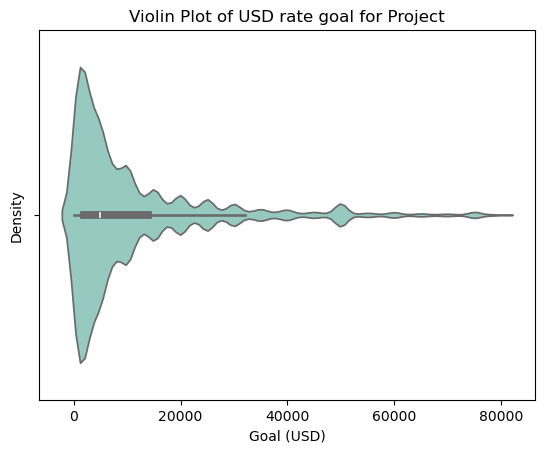

In [126]:
sns.violinplot(data=filtered_data, x="usd_goal_real", palette="Set3")
plt.title('Violin Plot of USD rate goal for Project')
plt.xlabel('Goal (USD)')
plt.ylabel('Density')
plt.show()

In [135]:
filtered_data = ks_2018[(ks_2018['usd_pledged_real'] > 0) & (ks_2018['usd_pledged_real'] < ks_2018['usd_pledged_real'].quantile(0.95))]

C:\Users\ahmed_gamal\AppData\Local\Temp\ipykernel_3304\1493743423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=filtered_data['usd_pledged_real'], palette='Set3')


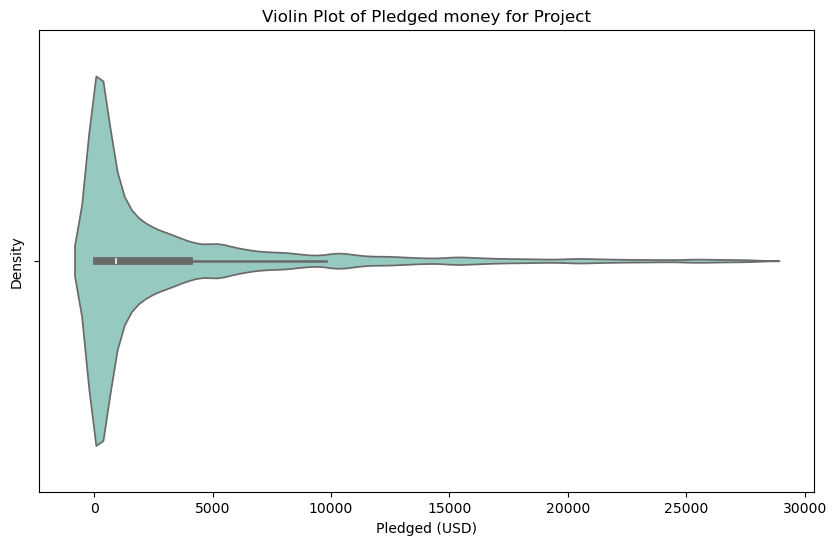

In [136]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=filtered_data['usd_pledged_real'], palette='Set3')
plt.title('Violin Plot of Pledged money for Project')
plt.xlabel('Pledged (USD)')
plt.ylabel('Density')
plt.show()

#### Main Categories of sucessful Projects

In [137]:
successful_projects = ks_2018[ks_2018['state'] == 'successful']
main_category_counts = successful_projects['main_category'].value_counts().head(30)
main_category_counts_sorted = main_category_counts.sort_values(ascending=False)

C:\Users\ahmed_gamal\AppData\Local\Temp\ipykernel_3304\729664802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_category_counts_sorted.values, y=main_category_counts_sorted.index, palette='viridis')


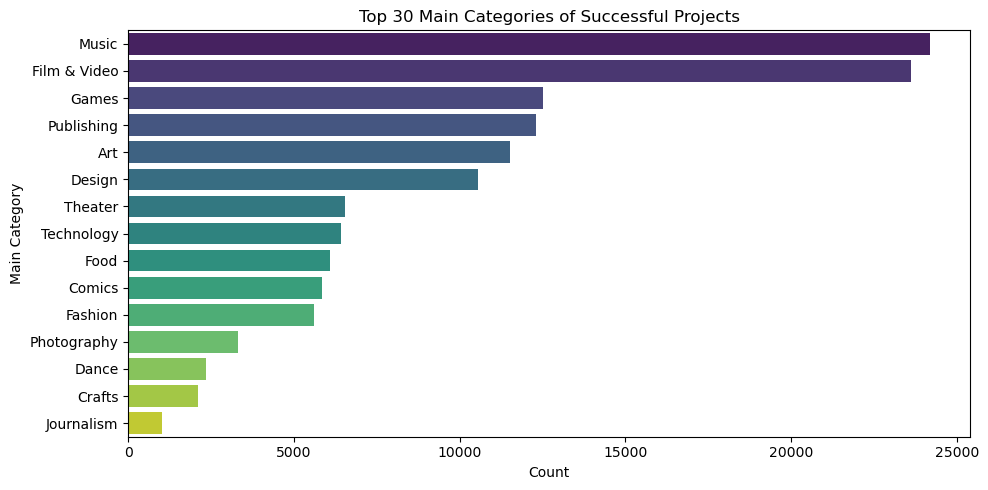

In [140]:
plt.figure(figsize=(10, 5))
sns.barplot(x=main_category_counts_sorted.values, y=main_category_counts_sorted.index, palette='viridis')
plt.title('Top 30 Main Categories of Successful Projects')
plt.xlabel('Count')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()

In [142]:
ks_2018.to_csv("ks_2018_EDA.csv")

##### Conclusion:
There is 35% of successful Kickstarter projects.

Successful fundraiser projects gain necessary amont of money on average for 30 days.

Results are usually achieved if money raised in project's categories: Music, Film & Video, Games, Publications, Art and Design.

For better success, try to fit your budget for a goal around 10 000 dollars, because it is mean amount of how much projects usually pledge.